In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
df = pd.read_csv("test.csv")
df

,id,mold_temp,melt_temp,hold_pressure,injection_speed
0,0,20.03000,271.030000,52.01000,132.000000
1,1,20.06000,271.040000,52.02000,132.010000
2,2,20.07000,271.060000,52.03000,132.010000
3,3,20.08000,271.070000,52.04000,132.020000
4,4,20.08000,271.070000,52.05000,132.020000
...,...,...,...,...,...
497,497,29.98000,280.960000,57.98000,137.960000
498,498,29.98000,280.990000,58.00000,137.970000
499,499,29.99000,281.000000,58.00000,137.990000
500,mean,25.10566,275.959460,55.13920,134.967740


In [3]:
mold = 25.56
melt = 277.16
hold = 54.88
inj = 135.64
mo_d = [df.iloc[-2][1]-2*df.iloc[-1][1],
       df.iloc[-2][1]+2*df.iloc[-1][1]]
me_d = [df.iloc[-2][2]-2*df.iloc[-1][2],
       df.iloc[-2][2]+2*df.iloc[-1][2]]
ho_d = [df.iloc[-2][3]-2*df.iloc[-1][3],
       df.iloc[-2][3]+2*df.iloc[-1][3]]
ij_d = [df.iloc[-2][4]-2*df.iloc[-1][4],
       df.iloc[-2][4]+2*df.iloc[-1][4]]


In [4]:
moldt = np.array([])
meltt = np.array([])
holdp = np.array([])
injs = np.array([])
de = np.array([])
for i in range(500):
    mo = round(random.uniform(mold-5,mold+5),2)
    me = round(random.uniform(melt-5,melt+5),2)
    ho = round(random.uniform(hold-3,hold+3),2)
    ij = round(random.uniform(inj-3,inj+3),2)
    if (mo<mo_d[0] or mo>mo_d[1]) or (me<me_d[0] or me>me_d[1]) or (ho<ho_d[0] or ho>ho_d[1]) or (ij<ij_d[0] or ij>ij_d[1]):
        d = "N"
    else: d = "Y"
    moldt = np.append(moldt,np.array([mo]))
    meltt = np.append(meltt,np.array([me]))
    holdp = np.append(holdp,np.array([ho]))
    injs = np.append(injs,np.array([ij]))
    de = np.append(de,np.array([d]))
l = len(moldt)

In [5]:
l = len(moldt)
l

500

In [6]:
df = pd.DataFrame([moldt, meltt, holdp, injs, de]).transpose()
len(df[df[4]=="N"])

28

In [7]:
mold_m = sum(moldt)/l
melt_m = sum(meltt)/l
hold_m = sum(holdp)/l
inj_m = sum(injs)/l
mold_s, melt_s, hold_s, inj_s = 0, 0, 0, 0
for i in range(l):
    mold_s += ((moldt[i]-mold_m)**2)/l
    melt_s += ((meltt[i]-melt_m)**2)/l
    hold_s += ((holdp[i]-hold_m)**2)/l
    inj_s += ((injs[i]-inj_m)**2)/l
mold_s **= 0.5
melt_s **= 0.5
hold_s **= 0.5
inj_s **= 0.5

In [8]:
df0 = pd.DataFrame([[mold_m, mold_s],[melt_m, melt_s], 
                    [hold_m, hold_s], [inj_m, inj_s],[]]).transpose()
df0

,0,1,2,3,4
0,25.58212,276.989320,54.76400,135.690820,NaN
1,2.92135,2.884014,1.67361,1.738342,NaN


In [9]:
df1 = pd.concat([df,df0])
df1

,0,1,2,3,4
0,24.9,273.11,54.81,137.66,Y
1,29.77,273.16,54.68,138.63,N
2,28.32,276.06,55.22,134.64,Y
3,26.69,274.62,54.36,134.6,Y
4,22.67,280.15,53.28,137.15,Y
...,...,...,...,...,...
497,22.43,273.0,52.84,136.04,Y
498,26.6,274.59,55.49,134.14,Y
499,29.94,279.78,57.64,134.81,Y
0,25.58212,276.98932,54.764,135.69082,NaN


In [11]:
df1.columns = ["mold_temp", "melt_temp", "hold_pressure", "injection_speed", "defect"]
df1
df1.to_csv("20211021.csv")

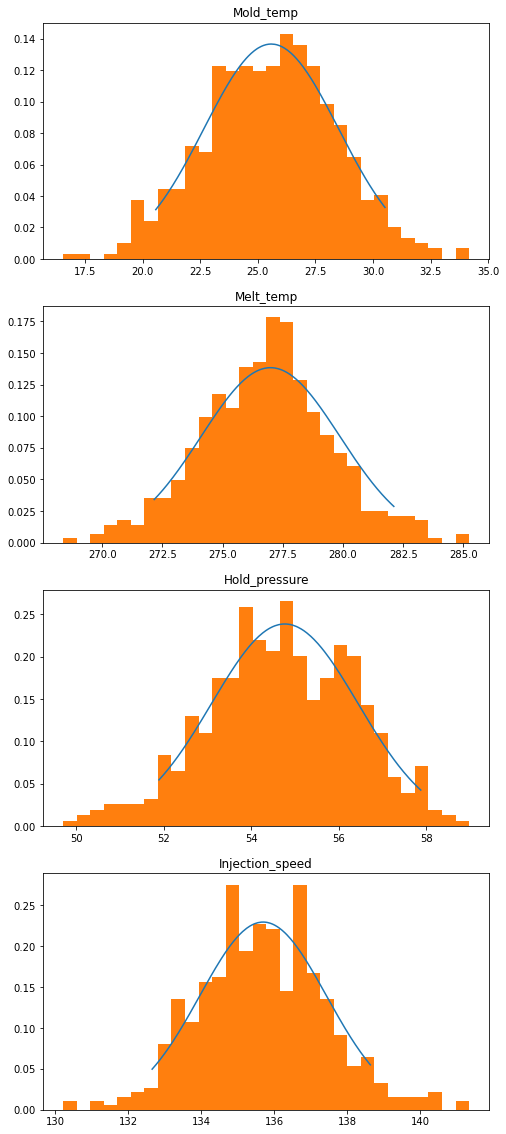

In [12]:
moldt.sort()
meltt.sort()
holdp.sort()
injs.sort()

mold_y = (1/np.sqrt(2*np.pi*mold_s**2)) * np.exp(-(moldt-mold_m)**2/(2*mold_s**2))
melt_y = (1/np.sqrt(2*np.pi*melt_s**2)) * np.exp(-(meltt-melt_m)**2/(2*melt_s**2))
hold_y = (1/np.sqrt(2*np.pi*hold_s**2)) * np.exp(-(holdp-hold_m)**2/(2*hold_s**2))
inj_y = (1/np.sqrt(2*np.pi*inj_s**2)) * np.exp(-(injs-inj_m)**2/(2*inj_s**2))
mold_y0 = np.random.normal(mold_m, mold_s, 500)
melt_y0 = np.random.normal(melt_m, melt_s, 500)
hold_y0 = np.random.normal(hold_m, hold_s, 500)
inj_y0 = np.random.normal(inj_m, inj_s, 500)

fig, ax = plt.subplots(4,1, figsize = (8,20))
ax[0].plot(moldt,mold_y)
ax[0].hist(mold_y0, density=True, bins=30)
ax[0].set_title("Mold_temp")

ax[1].plot(meltt,melt_y)
ax[1].hist(melt_y0, density=True, bins=30)
ax[1].set_title("Melt_temp")

ax[2].plot(holdp,hold_y)
ax[2].hist(hold_y0, density=True, bins=30)
ax[2].set_title("Hold_pressure")

ax[3].plot(injs,inj_y)
ax[3].hist(inj_y0, density=True, bins=30)
ax[3].set_title("Injection_speed")

plt.savefig("20211021.png")